In [195]:

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns


This is a Fire detection Model which is based on Classification Machine learning algorithm. The Test accuracy is astonishingly 100%.

Lets start of with importing the required libraries


In [196]:
data = pd.read_csv("/Users/jarvis/pymycod/cintel/smoke_detection_iot.csv")
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


we use pandas for reading the csv file, we assigned our dataset as data and from now on we'll be using data every time if we need to make changes to our data

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


data.info() is used to check if the datatypes of all the values present inside our dataset

In [198]:
data.isnull().sum()


Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

data.isnull().sum() is used to check for the null values in the dataset so we can filter out the rows that contain null values

In [199]:
data = data.drop(["Unnamed: 0","UTC"],axis=1)

we use drop function of the pandas library to drop a particular column from the data, in this case we remove unamed: 0 and UTC columns as unamed: 0 is just a index which we dont want and UTC is jus a id given to each and every row
so we can remove them as they are kindof unnecesary.

In [200]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

Now we check the total count for fire and no fire in our dataset. as we can see that we have a major difference in the number of fire and no fire cases, well have to artifically make new values in a balanced way so our model isnt inclined towards a particular result, we'll use SMOTE for it.

In [201]:
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


<AxesSubplot:>

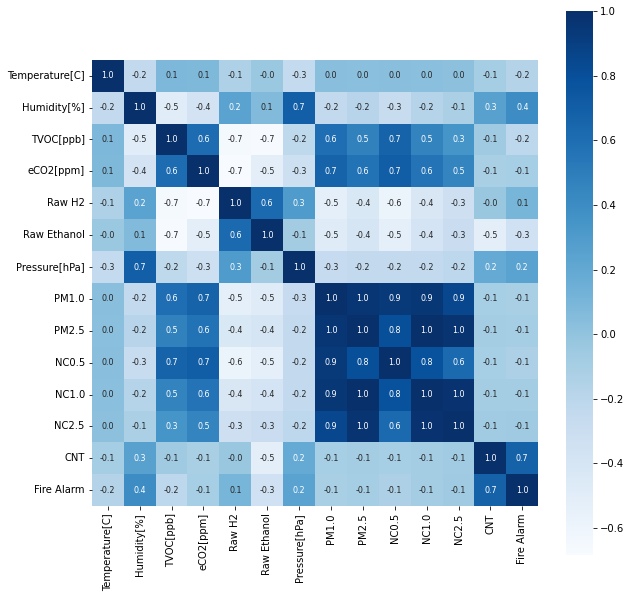

In [202]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

now let us find the relation between the different features by plotting a correlation map which will tell us about all the fetures that are inversely or directly co-related or how much are they co-related to each other.

cmap is used to give colour, annot is used to write the annotations and fmt for maximum decimal.

In [203]:
data = data.drop(columns = ['NC1.0','PM1.0'],axis = 1)

As (NC1 and NC2.5 ) and (PM1 and PM2.5) are purely co related or same we can use jus one of em, so les delete any one in each case for training our model.

In [204]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,4,0


In [205]:
x=data.drop(columns = ['Fire Alarm'])
y=data['Fire Alarm']

We seperate our features and labels as x and y, x being the arrays of all the values except fire alarm and y being fire alarm.
we are predicting for y so its our label

In [206]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

as we have values in our dataset varying in a huge range from 400 to 20. les jus scale the values to a small range

In [207]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 393892)

Using train_test_split from sklean to split the data into testing and training data, here the test size is 30% of the whole dataset and random_state is used for shuffling data so its random

In [208]:

smote = SMOTE()

this we use also to increase the accuracy of the model, this technique is called SMOTE which stands for Synthetic Minority Oversampling Technique basically it helps in balancing the dataset by creating more values in the balanced way 

In [209]:
y_train.value_counts()

1    31439
0    12402
Name: Fire Alarm, dtype: int64

In [210]:
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)

In [211]:
y_train_new.value_counts()

1    31439
0    31439
Name: Fire Alarm, dtype: int64

Using smote we jus made all the imbalenced labels to exactly the same so our model is not partial towards a particular label

In [212]:
model = RandomForestClassifier()
model.fit(x_train_new,y_train_new)

RandomForestClassifier()

we use the random forest classifier which is like the resultant or combination of many decision trees and also a classification algorithm.


In [213]:
predicted =model.predict(x_test)

g=accuracy_score(y_test,predicted)
print(f"Your accuracy is: {round(g*100,2)}%")

Your accuracy is: 100.0%


In [214]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

[Text(0, 0.5, 'No Fire'), Text(0, 1.5, 'Fire')]

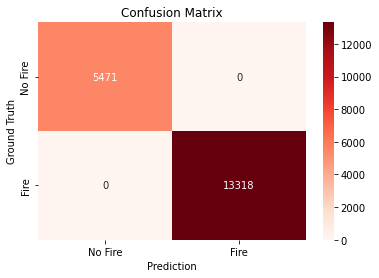

In [215]:
cc = confusion_matrix(y_test,predicted)
ax = sns.heatmap(cc, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix")
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')

ax.xaxis.set_ticklabels(['No Fire','Fire'])
ax.yaxis.set_ticklabels(['No Fire','Fire'])

plotting a confusion matrix prediction nd the ground truth using seaborn heatmap 
we are using the test labels and the predicted values
we do this for better understanding of our model predictions.

In [216]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5471
           1       1.00      1.00      1.00     13318

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

